### 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from tabulate import tabulate
import scipy.stats as stats
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/customer-segmentation-data')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### 2. EDA + Visualization

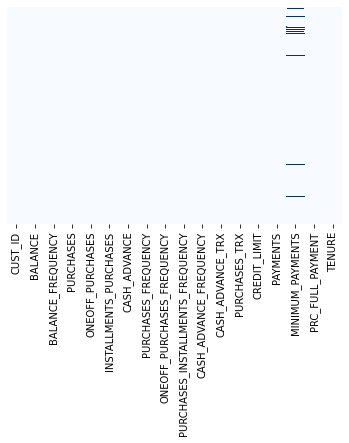

In [ ]:
# Visual representation of the missing data in the dataset
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues');

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#fill missing values
from sklearn.impute import KNNImputer

imputer = KNNImputer()
df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']] = imputer.fit_transform(df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']])

In [ ]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df.drop('CUST_ID', axis = 1, inplace = True)

### Feature Analysis

In [ ]:
### Understanding the distribution of the numerical column

def diagnostic_plots(df, variable):
    plt.figure(figsize = (16, 4))
    
    
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.ylabel('Variable quantiles')

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')

    plt.show()

In [ ]:
diagnostic_plots(df, 'BALANCE')

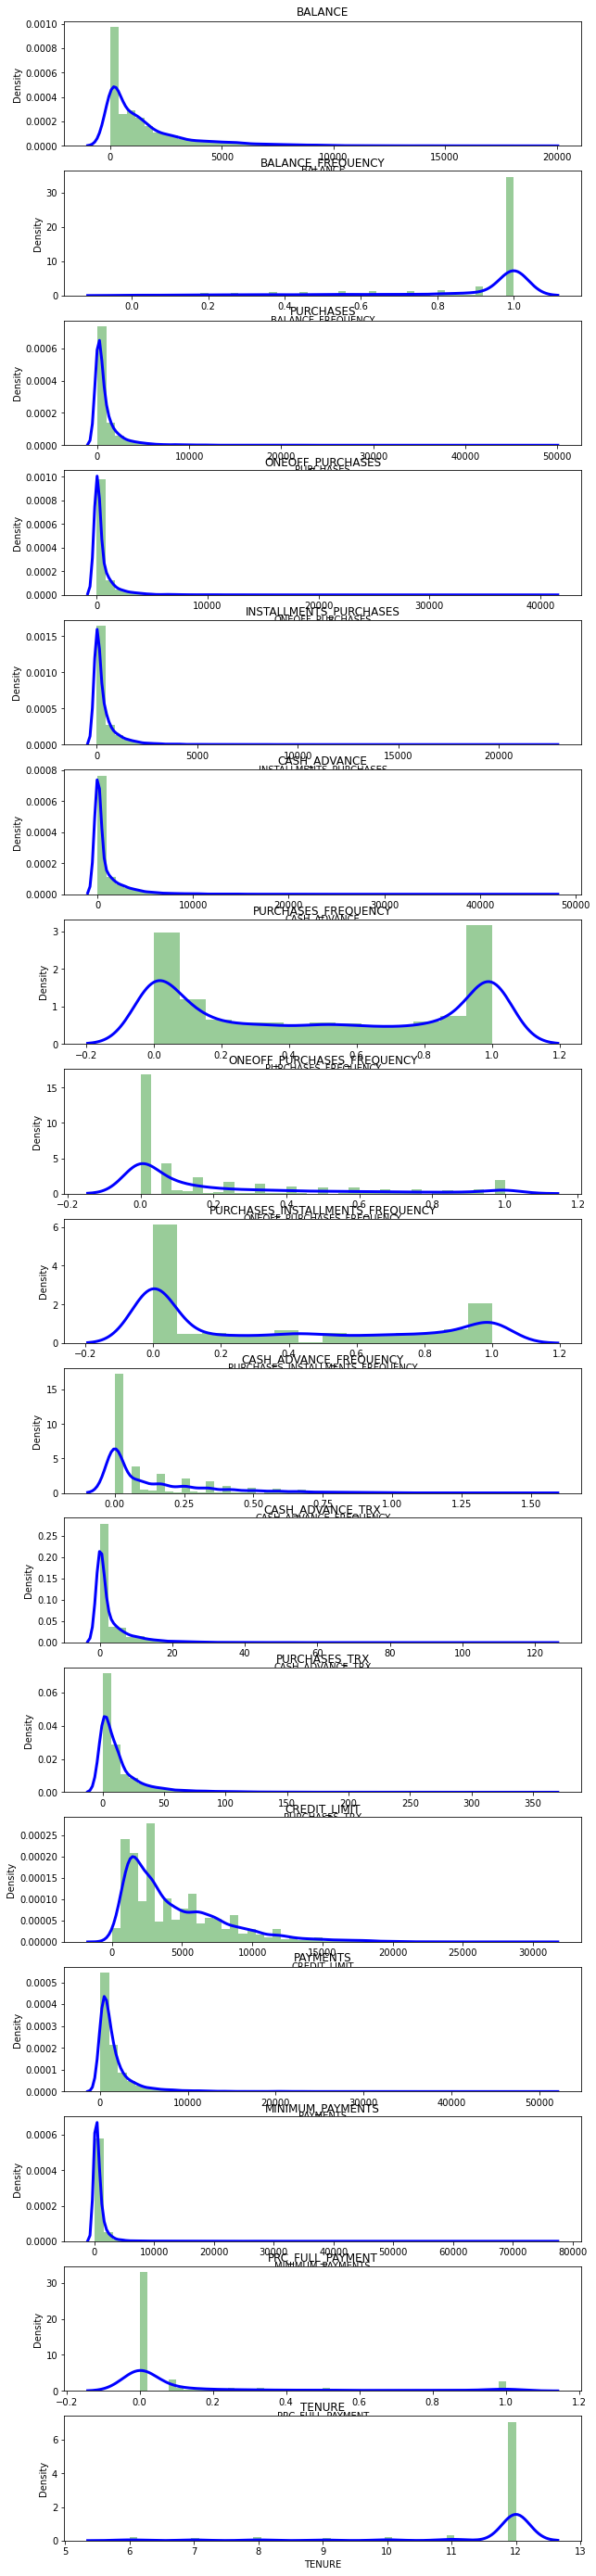

In [ ]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize = (10, 50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws= {'color': 'b', 'lw': 3, 'label': 'KDE'}, hist_kws = {'color': 'g'})
  plt.title(df.columns[i])



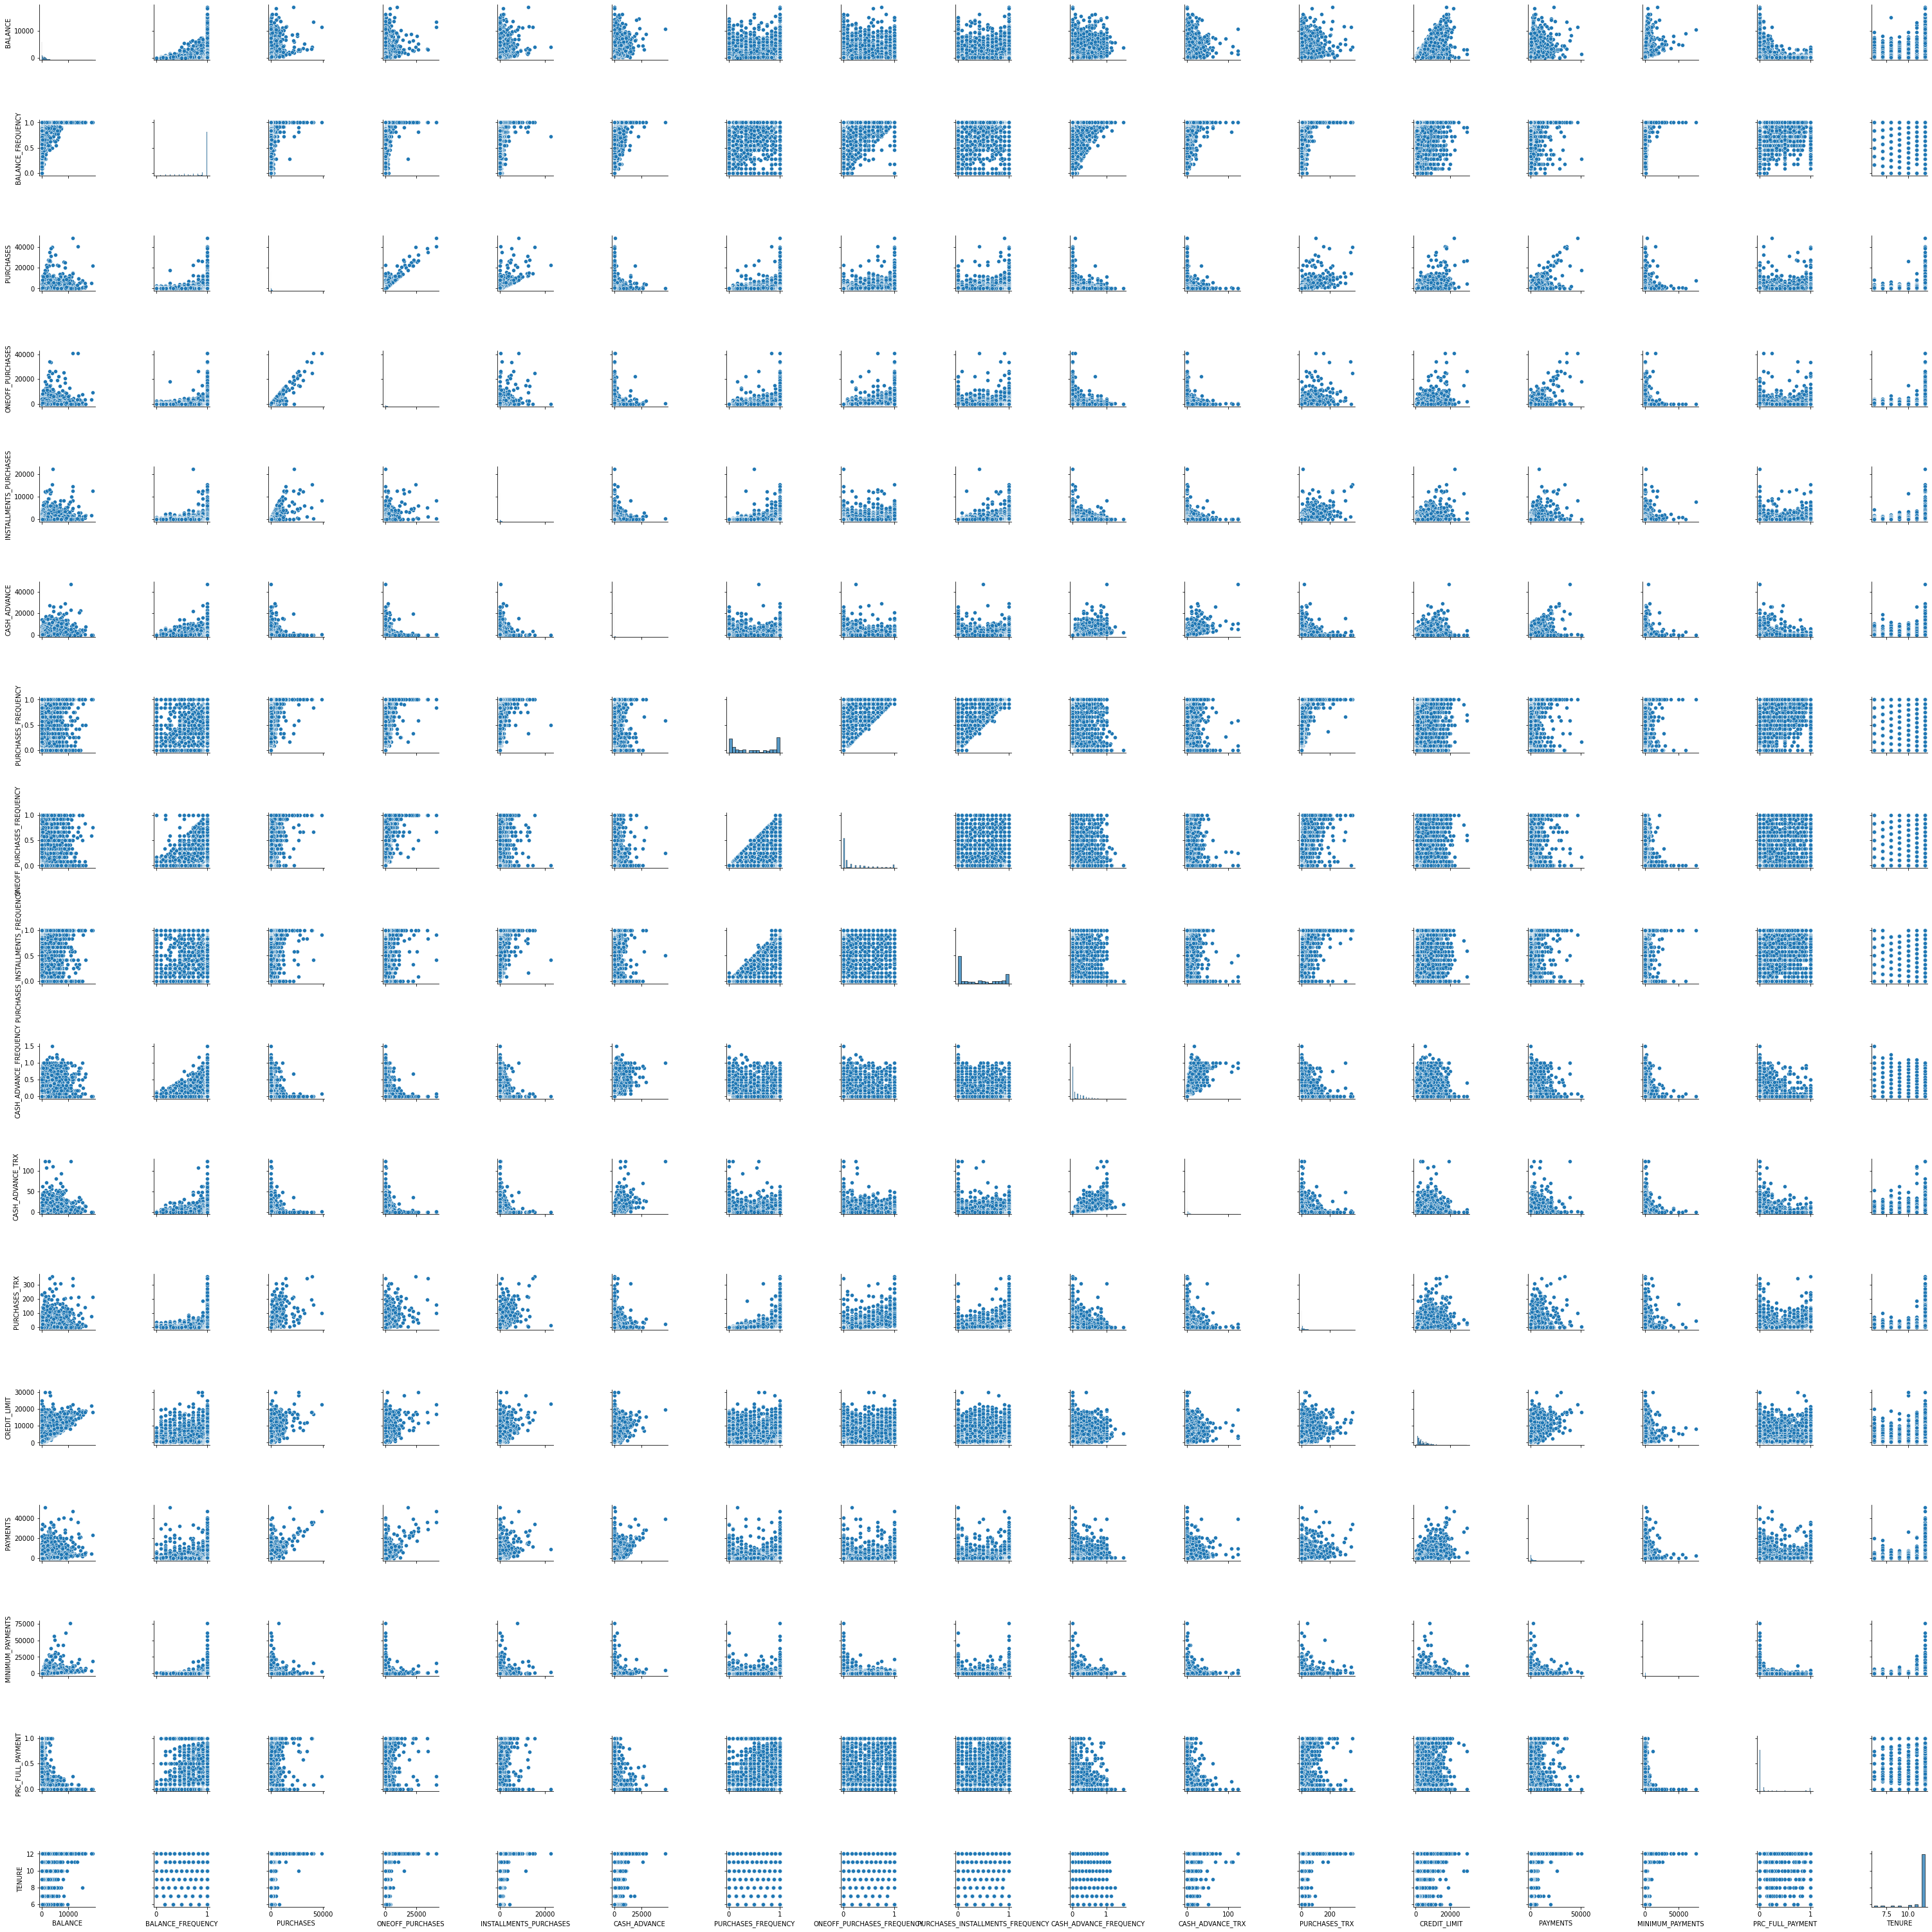

In [ ]:
sns.pairplot(df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'


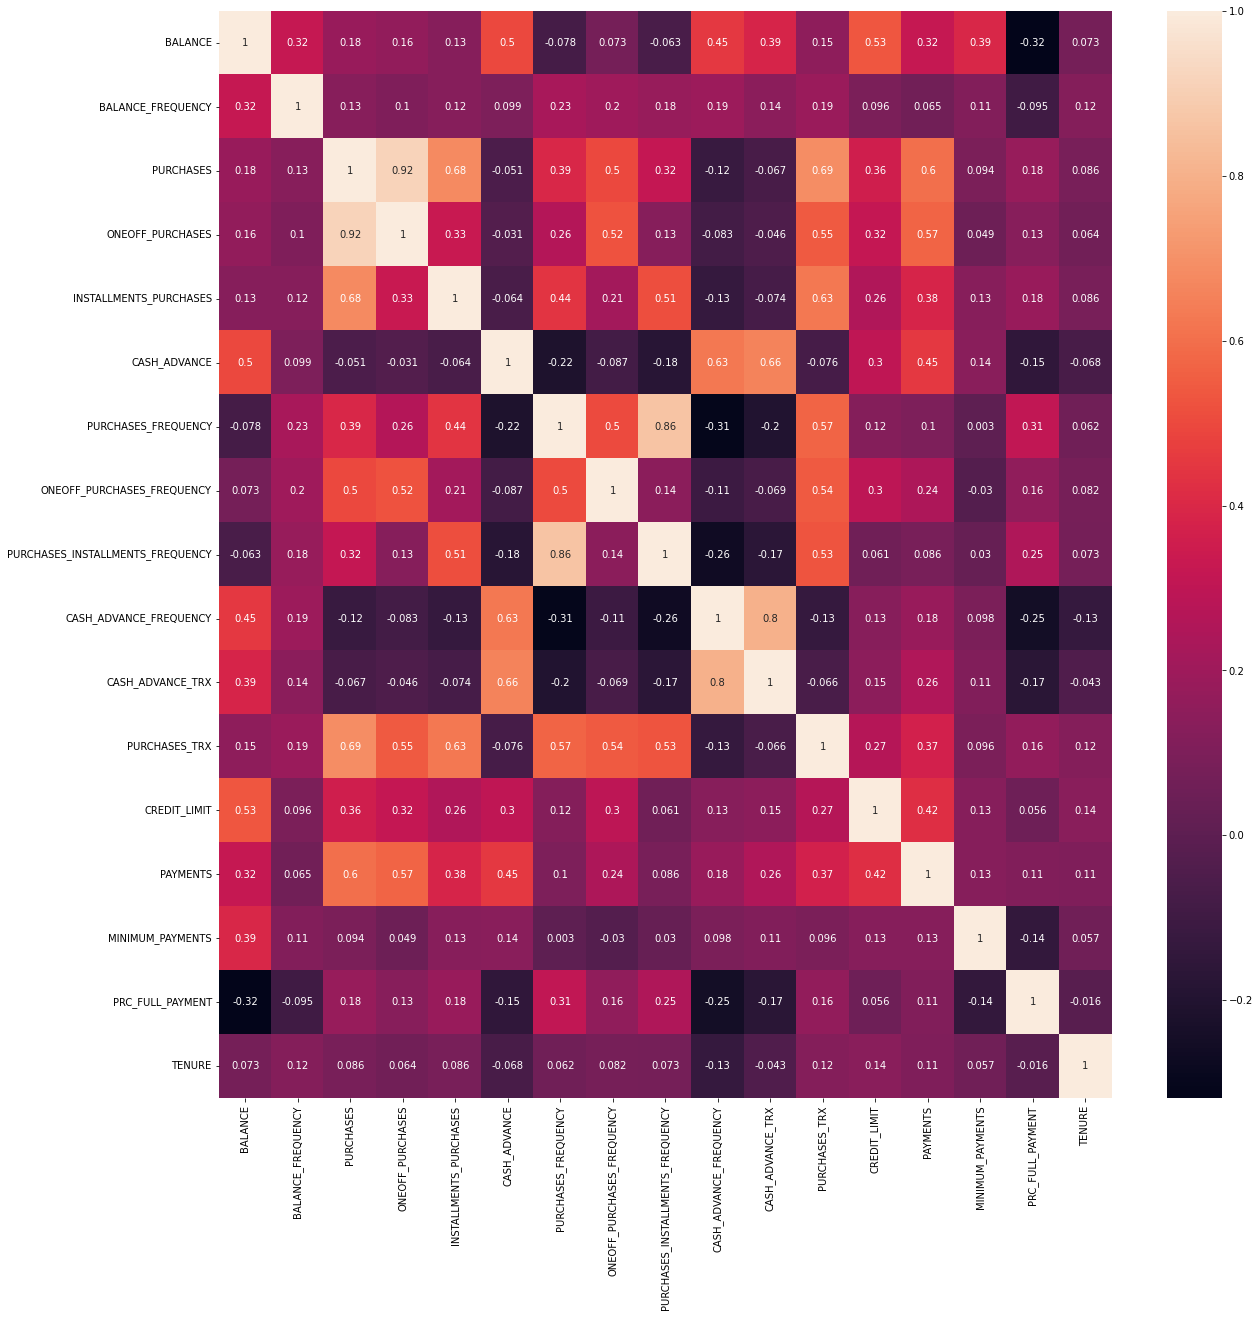

In [ ]:
f, ax = plt.subplots(figsize = (20, 20))
corrs = df.corr()
sns.heatmap(corrs, annot = True)

In [ ]:
# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


### 3a. Optimal Number of Clusters - Elbow Method

In [ ]:
# Let's scale the data first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
df_scaled.shape

(8950, 17)

In [ ]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [ ]:
score_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  score_1.append(kmeans.inertia_)
# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7.

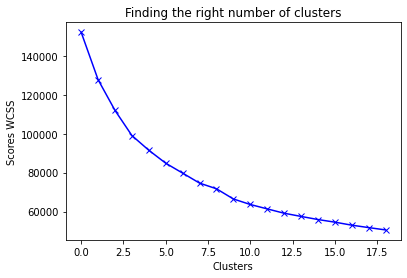

In [ ]:
plt.plot(score_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

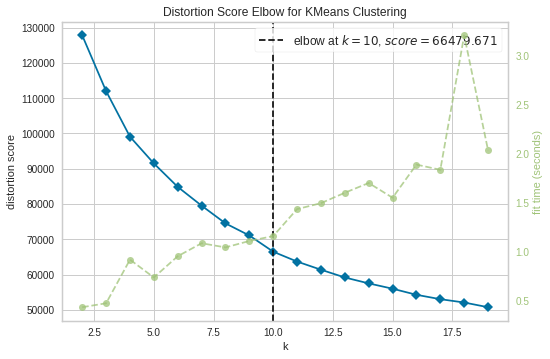

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(2,20))

visualizer.fit(df_scaled)
visualizer.show()
plt.show()

### 3b. Optimal Number of Clusters - Silhouette Method

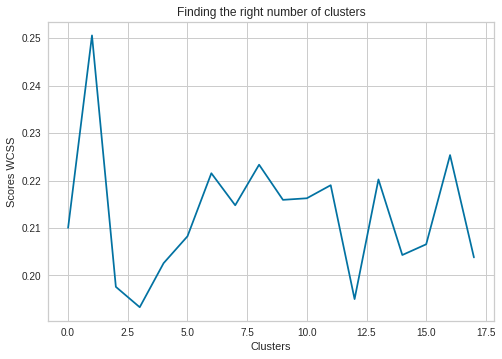

In [ ]:
from sklearn.metrics import silhouette_score
silhoutte_scores = []
range_values = range(2, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  silhoutte_scores.append(silhouette_score(df_scaled, kmeans.labels_))

plt.plot(silhoutte_scores, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

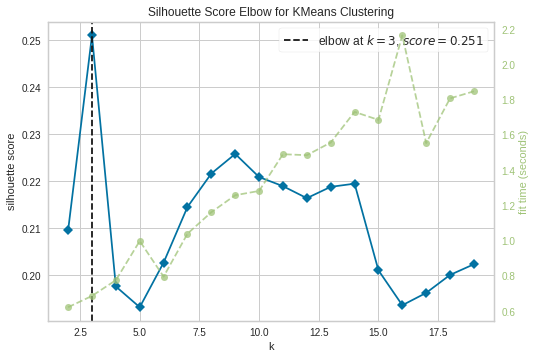

In [ ]:
visualizer = KElbowVisualizer(kmeans, k=(2,20), metric='silhouette')

visualizer.fit(df_scaled)
visualizer.show()
plt.show()

### 4a. Apply K-Means Algorithm - 8 clusters

In [ ]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [ ]:
labels

array([2, 1, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.121858,0.403109,0.564973,0.684705,0.077745,-0.332601,0.998872,1.914235,0.215262,-0.418727,-0.333855,0.659581,0.465861,0.163076,-0.156076,0.460105,0.274536
1,1.674321,0.394876,-0.220860,-0.157055,-0.233748,1.992908,-0.481496,-0.211898,-0.421828,1.910990,1.915635,-0.270219,1.013291,0.798373,0.547400,-0.395539,0.072107
2,0.006364,0.403788,-0.354159,-0.238896,-0.398401,-0.100377,-0.840669,-0.382985,-0.750573,0.092847,-0.036039,-0.477567,-0.306936,-0.252080,-0.013318,-0.454814,0.273785
3,-0.334235,-0.345364,-0.287007,-0.212744,-0.287412,0.068171,-0.202320,-0.283605,-0.226363,0.308382,0.000348,-0.387485,-0.563456,-0.391355,-0.209255,0.013610,-3.198580
4,-0.700802,-2.141183,-0.309850,-0.234317,-0.302039,-0.320128,-0.554233,-0.440811,-0.439716,-0.521014,-0.376316,-0.418604,-0.173264,-0.191875,-0.256477,0.285369,0.200376
5,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337681,1.532138,0.601452,0.259664,0.335772
6,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174214,8.991136,1.064817,1.236317,0.295702
7,-0.358153,0.331954,-0.029774,-0.240651,0.371521,-0.362572,0.996574,-0.380825,1.207885,-0.472004,-0.359611,0.195098,-0.259428,-0.213218,-0.029917,0.313970,0.255466


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers



# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.121858,0.403109,0.564973,0.684705,0.077745,-0.332601,0.998872,1.914235,0.215262,-0.418727,-0.333855,0.659581,0.465861,0.163076,-0.156076,0.460105,0.274536
1,1.674321,0.394876,-0.220860,-0.157055,-0.233748,1.992908,-0.481496,-0.211898,-0.421828,1.910990,1.915635,-0.270219,1.013291,0.798373,0.547400,-0.395539,0.072107
2,0.006364,0.403788,-0.354159,-0.238896,-0.398401,-0.100377,-0.840669,-0.382985,-0.750573,0.092847,-0.036039,-0.477567,-0.306936,-0.252080,-0.013318,-0.454814,0.273785
3,-0.334235,-0.345364,-0.287007,-0.212744,-0.287412,0.068171,-0.202320,-0.283605,-0.226363,0.308382,0.000348,-0.387485,-0.563456,-0.391355,-0.209255,0.013610,-3.198580
4,-0.700802,-2.141183,-0.309850,-0.234317,-0.302039,-0.320128,-0.554233,-0.440811,-0.439716,-0.521014,-0.376316,-0.418604,-0.173264,-0.191875,-0.256477,0.285369,0.200376
5,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337681,1.532138,0.601452,0.259664,0.335772
6,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174214,8.991136,1.064817,1.236317,0.295702
7,-0.358153,0.331954,-0.029774,-0.240651,0.371521,-0.362572,0.996574,-0.380825,1.207885,-0.472004,-0.359611,0.195098,-0.259428,-0.213218,-0.029917,0.313970,0.255466


In [ ]:
labels.shape

(8950,)

In [ ]:
labels.max(), labels.min()

(7, 0)

In [ ]:
# concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


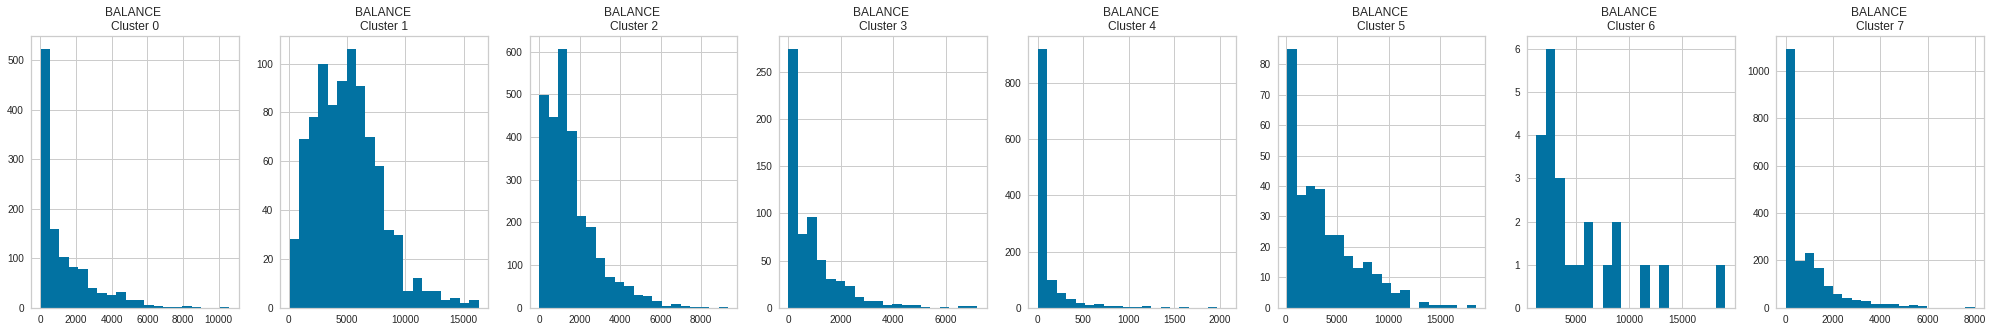

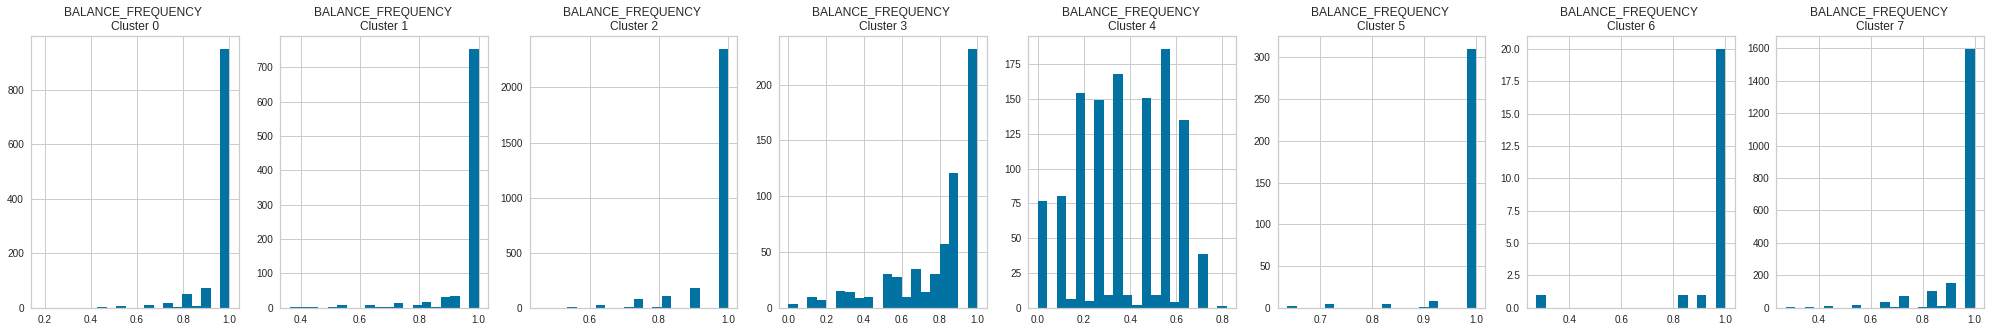

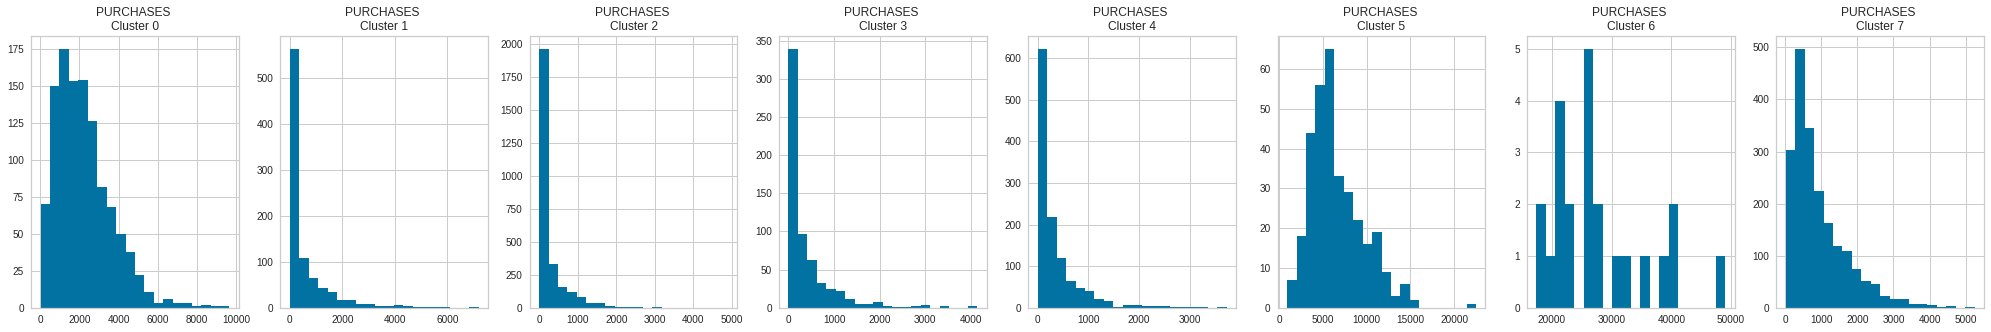

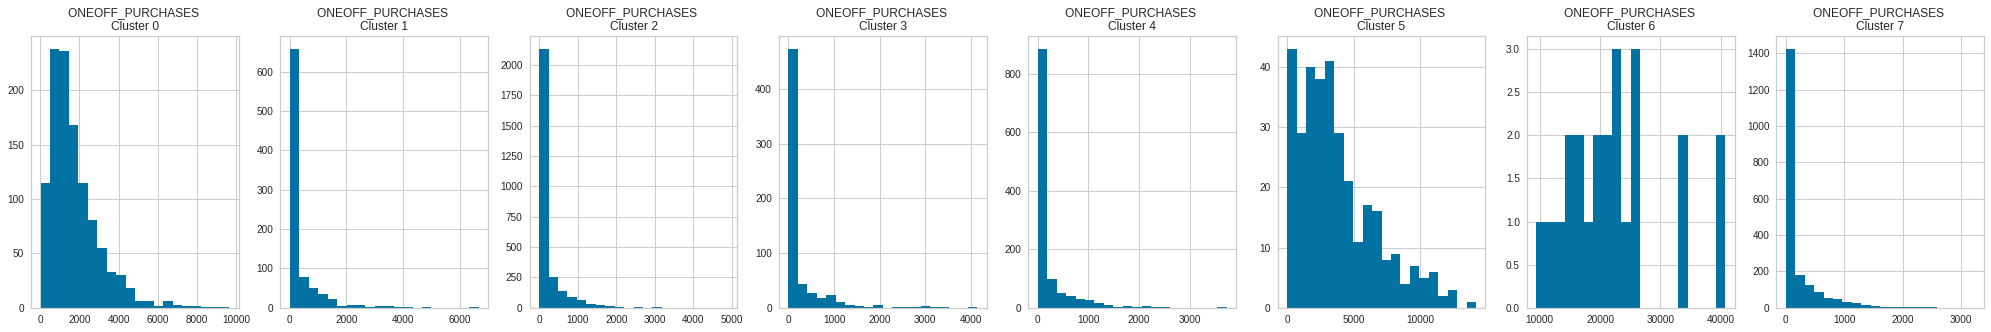

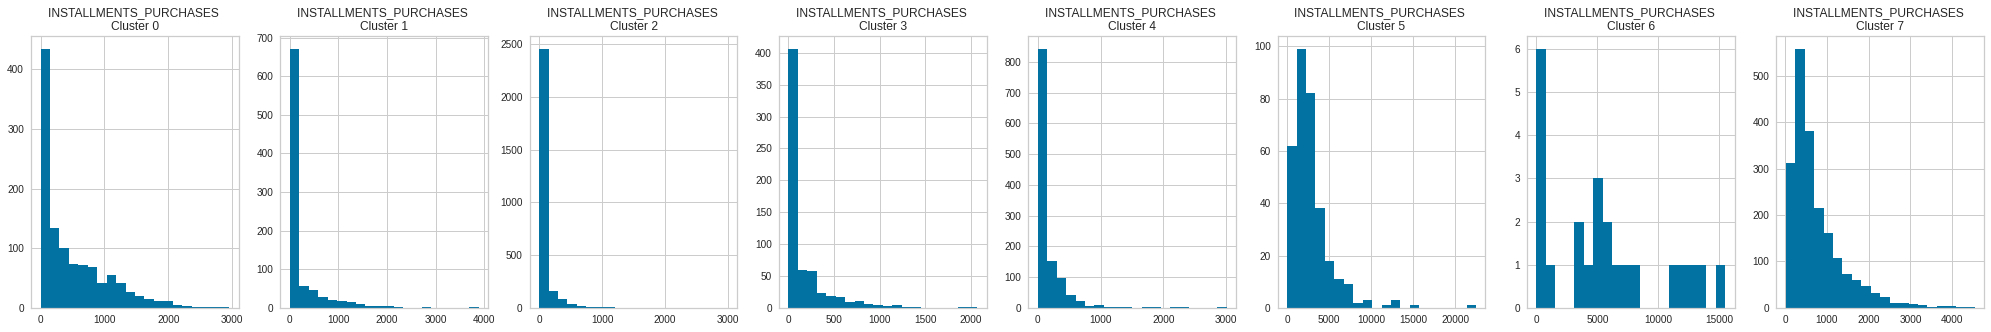

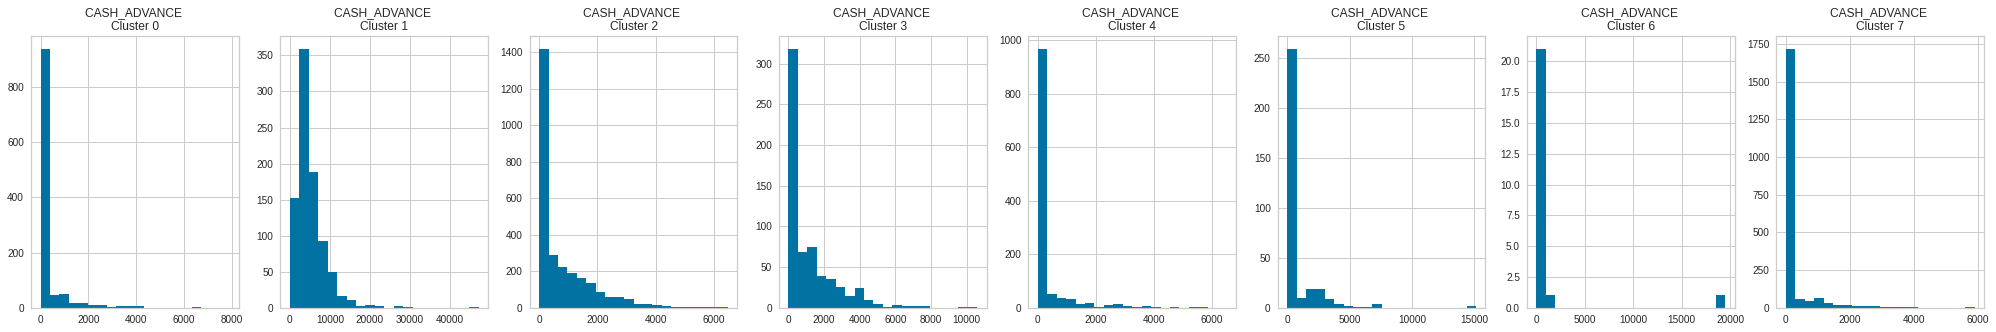

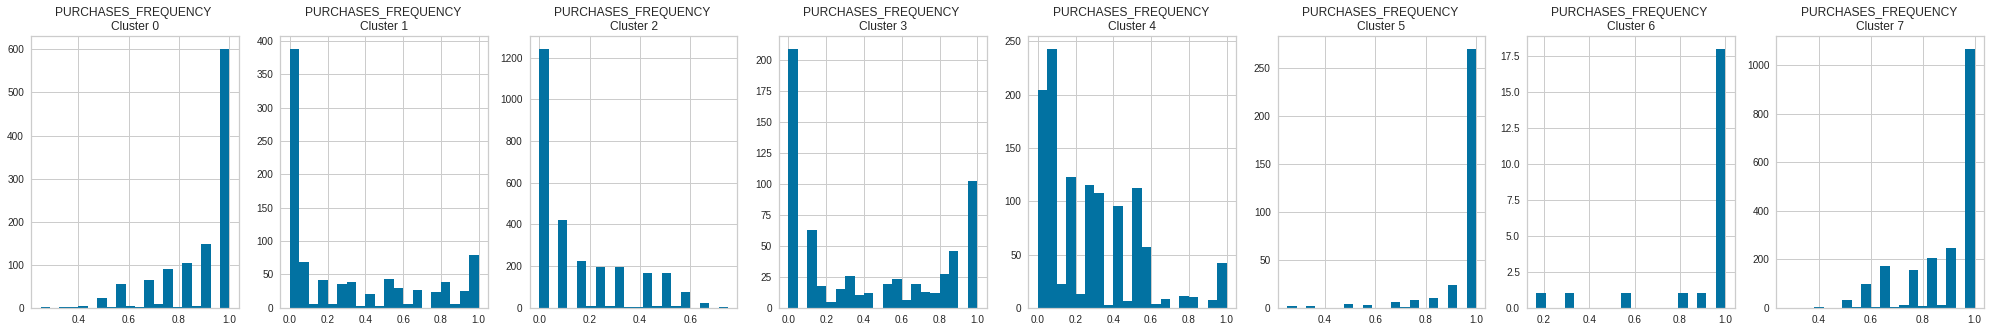

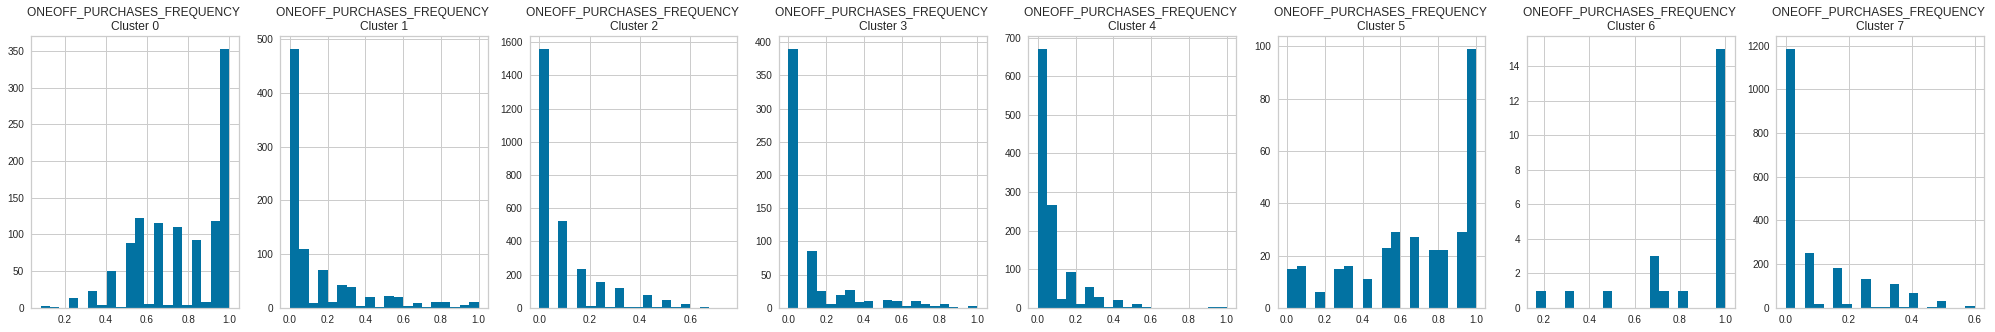

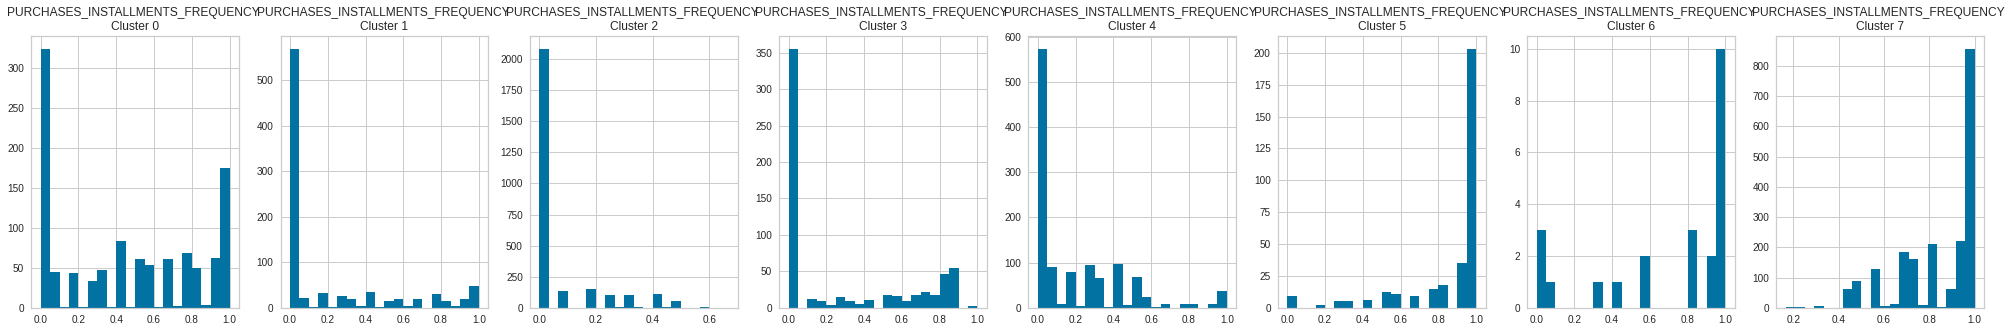

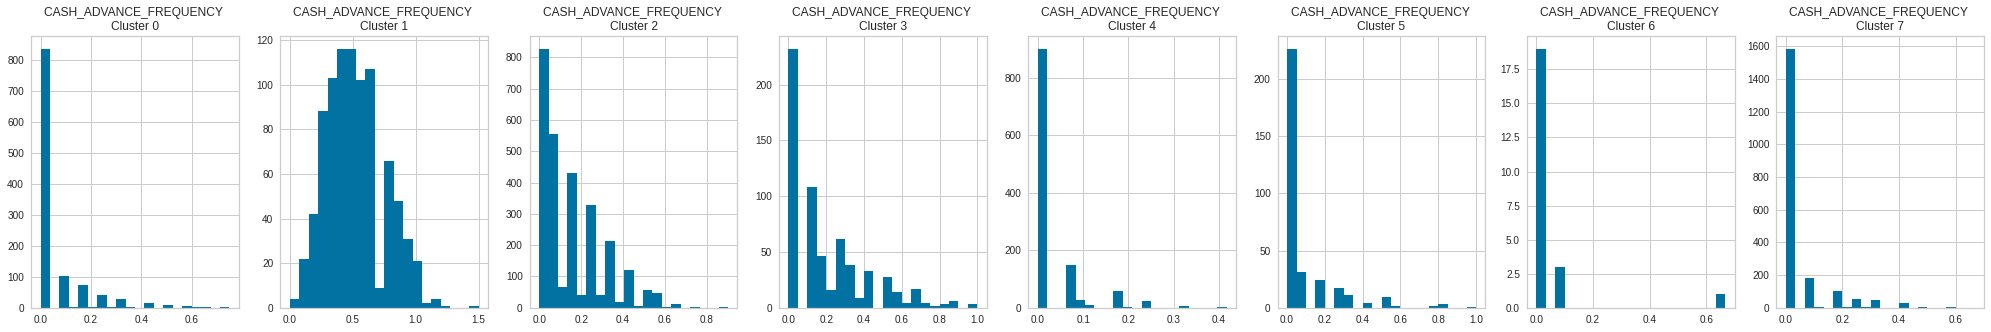

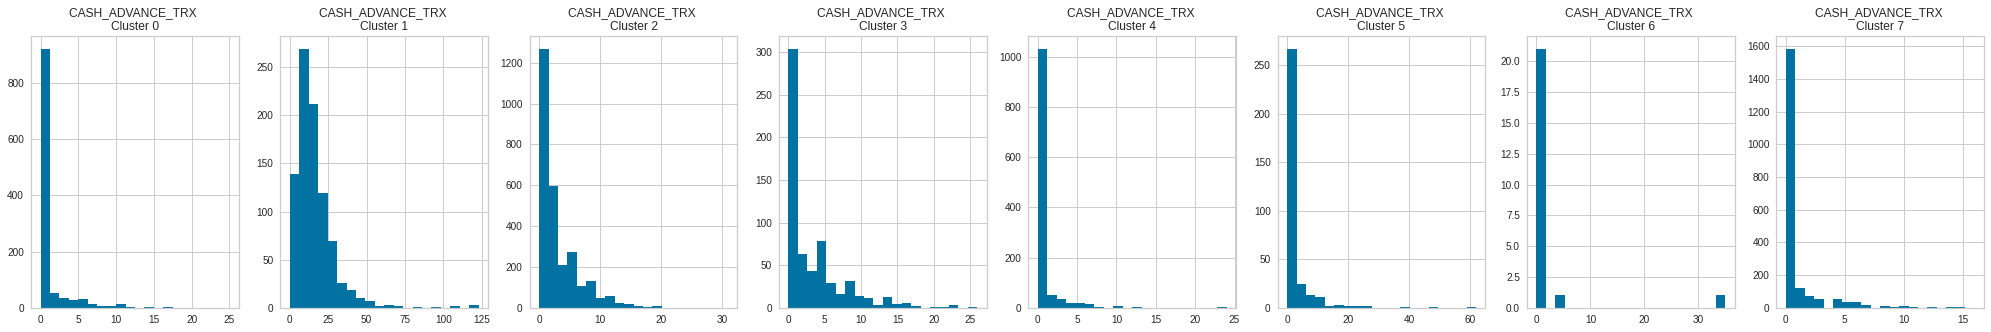

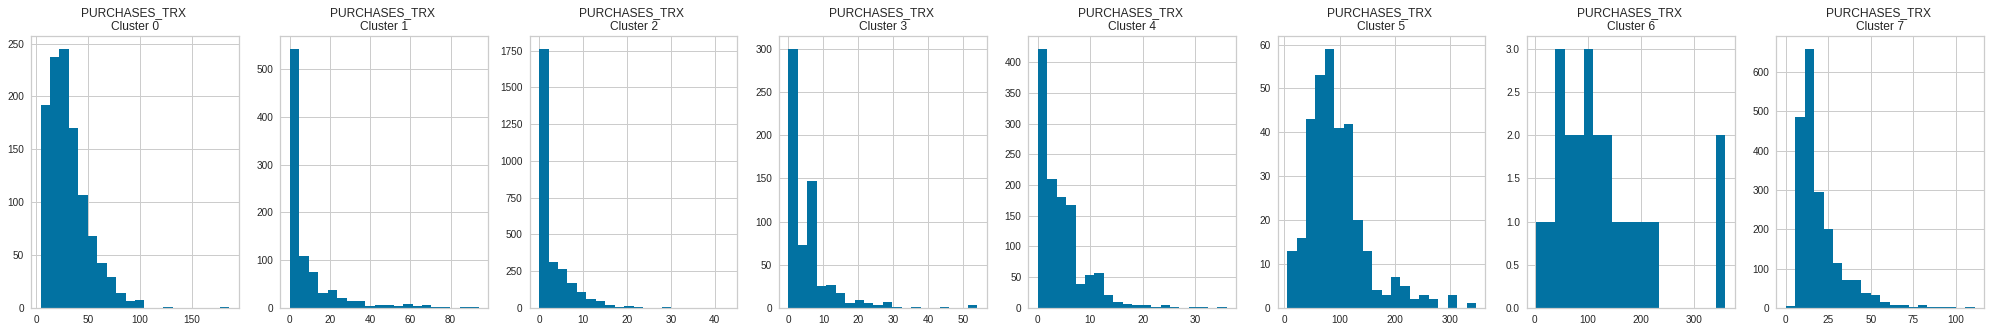

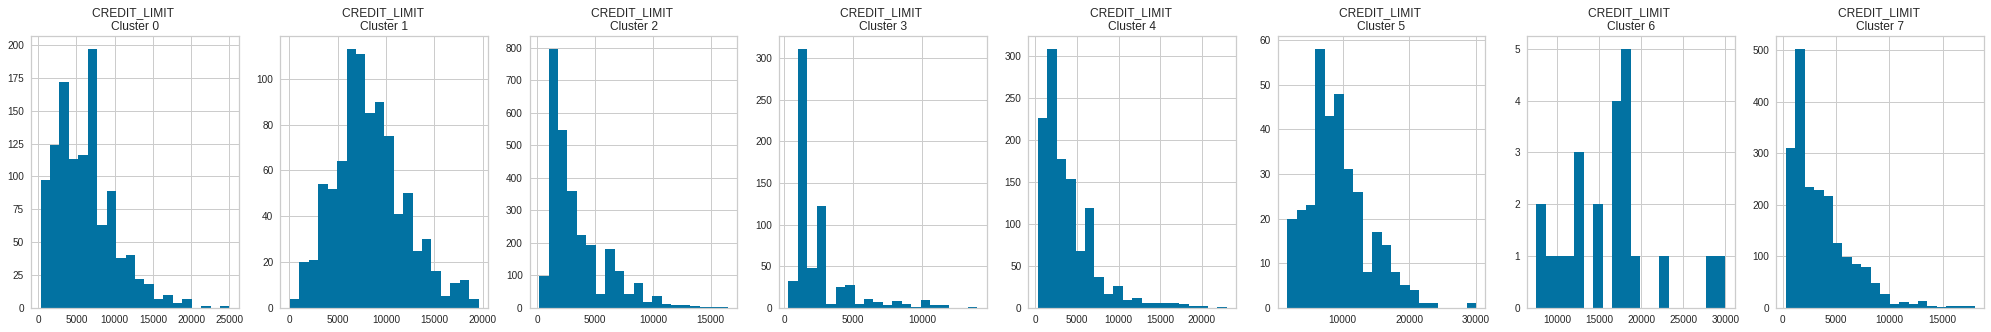

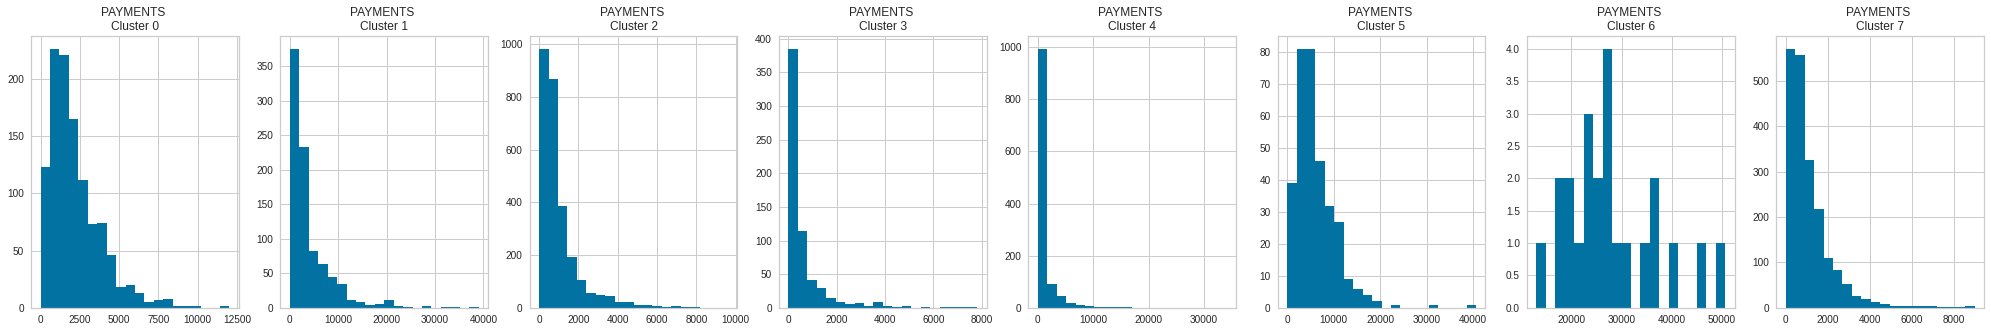

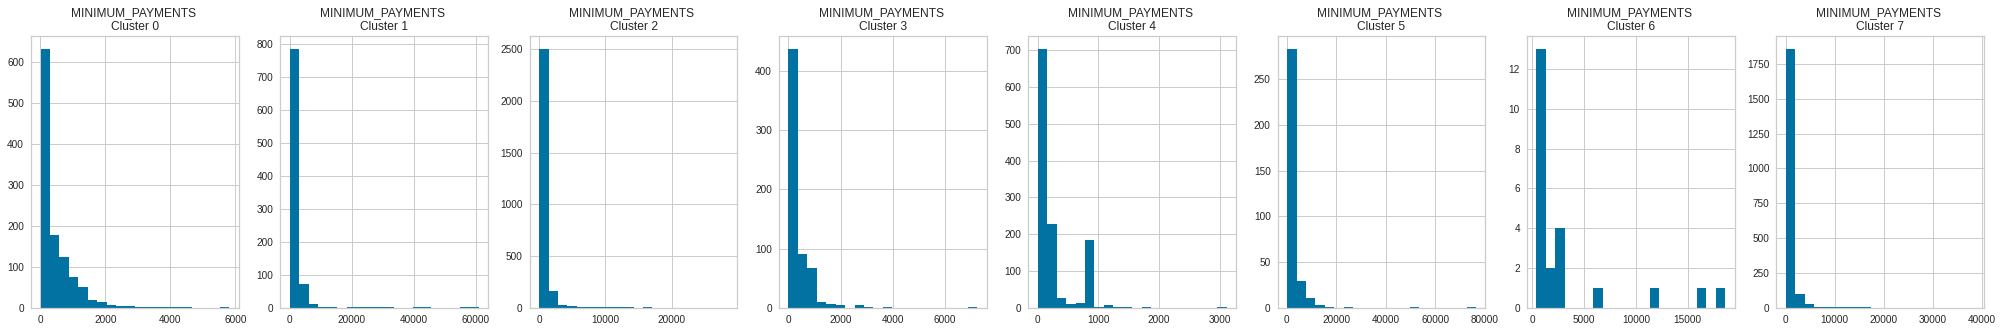

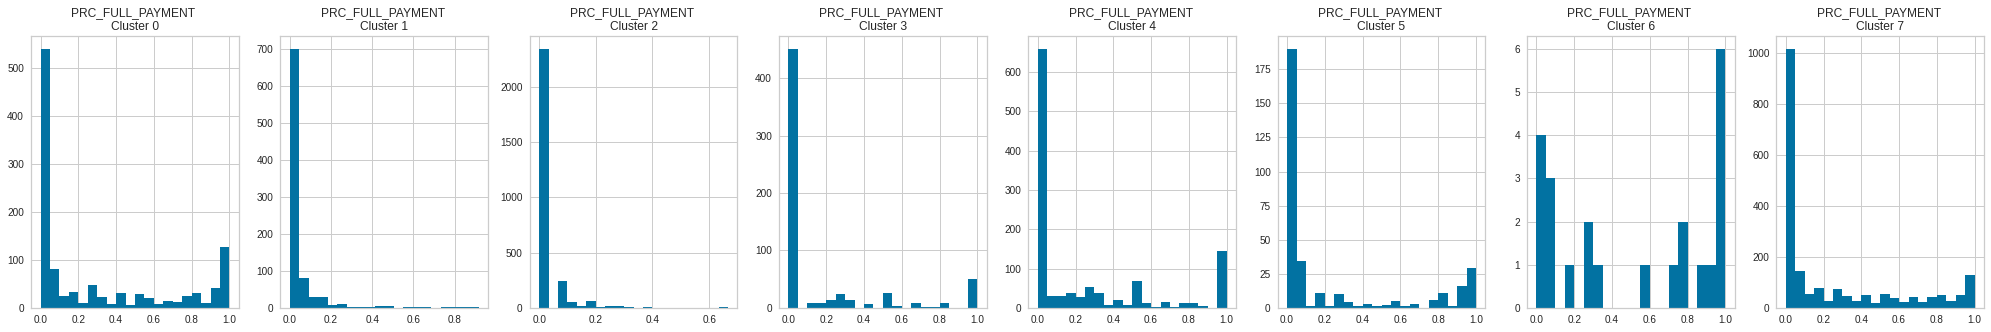

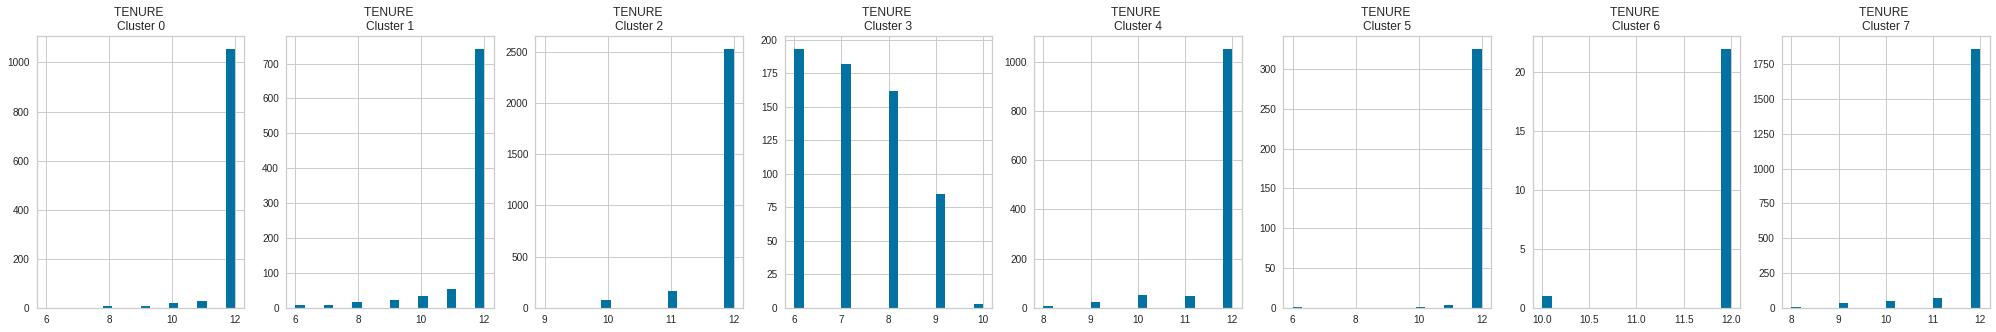

In [ ]:
# Plot the histogram of various clusters
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1, 8, j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title(f"{i} \nCluster {j}")

#### Quality of Each Cluster

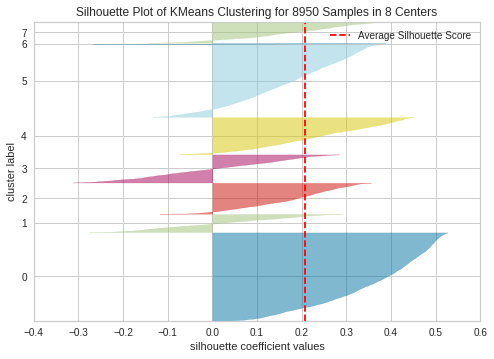

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=8, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()
plt.show()

###  5. Principal Component Analysis & Visualization

In [ ]:
# Obtain the principal components 
pca = PCA(n_components = 2)
principal_comps = pca.fit_transform(df_scaled)
principal_comps

array([[-1.68224198, -1.07640782],
       [-1.1382106 ,  2.50649345],
       [ 0.96971136, -0.38351211],
       ...,
       [-0.92628579, -1.81082085],
       [-2.33661272, -0.65796919],
       [-0.55648875, -0.40049893]])

In [ ]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comps, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682242,-1.076408
1,-1.138211,2.506493
2,0.969711,-0.383512
3,-0.873599,0.043178
4,-1.599442,-0.688530


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682242,-1.076408,2
1,-1.138211,2.506493,1
2,0.969711,-0.383512,0
3,-0.873599,0.043178,2
4,-1.599442,-0.688530,2


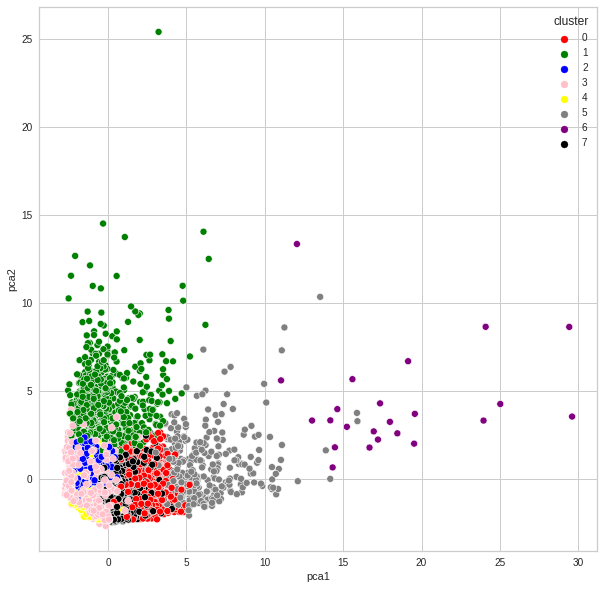

In [ ]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'grey', 'purple', 'black'])

### 6. Dimensionality Reduction using Autoencoder

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD


In [ ]:
input_df = Input(shape = (17,))
x = Dense(7, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer= 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer= 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer= 'glorot_uniform')(x)

encoded = Dense(10, activation = 'relu', kernel_initializer= 'glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer= 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer= 'glorot_uniform')(x)

decoded = Dense(17, activation = 'relu', kernel_initializer= 'glorot_uniform')(x)

#Autoencoder
autoencoder = Model(input_df, decoded)

#Encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
df_scaled.shape

(8950, 17)

In [ ]:
autoencoder.fit(x = df_scaled, y = df_scaled, batch_size = 128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 5s 56ms/step - loss: 0.6987
Epoch 2/25
70/70 [==============================] - 4s 55ms/step - loss: 0.5849
Epoch 3/25
70/70 [==============================] - 4s 55ms/step - loss: 0.5654
Epoch 4/25
70/70 [==============================] - 4s 55ms/step - loss: 0.5420
Epoch 5/25
70/70 [==============================] - 4s 55ms/step - loss: 0.5180
Epoch 6/25
70/70 [==============================] - 4s 60ms/step - loss: 0.5137
Epoch 7/25
70/70 [==============================] - 7s 94ms/step - loss: 0.5057
Epoch 8/25
70/70 [==============================] - 6s 87ms/step - loss: 0.4982
Epoch 9/25
70/70 [==============================] - 8s 118ms/step - loss: 0.4935
Epoch 10/25
70/70 [==============================] - 4s 60ms/step - loss: 0.4881
Epoch 11/25
70/70 [==============================] - 4s 55ms/step - loss: 0.4847
Epoch 12/25
70/70 [==============================] - 4s 54ms/step - loss: 0.4823
Epoch 13/25
70/70 [=================

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [ ]:
#dimensionality reduction
pred = encoder.predict(df_scaled)
pred.shape

(8950, 10)

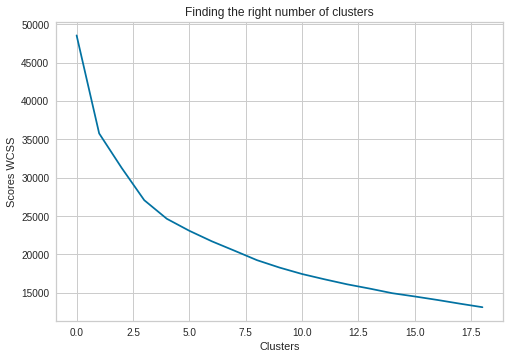

In [ ]:
score_2 = []

range_values_ = range(1, 20)

for i in range_values_:
  kmeans_reduced = KMeans(n_clusters = i)
  kmeans_reduced.fit(pred)
  score_2.append(kmeans_reduced.inertia_)

plt.plot(score_2, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

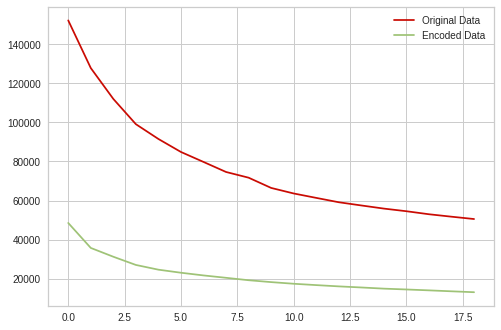

In [ ]:
plt.plot(score_1, 'rx-')
plt.plot(score_2, 'gx-')
plt.legend(['Original Data', 'Encoded Data'])

#we can select lesser number of clusters in this case (Autoencoder)

In [ ]:
kmeans_reduced = KMeans(4)
kmeans_reduced.fit(pred)
labels_reduced = kmeans_reduced.labels_

In [ ]:
df_cluster_dr = pd.concat([df, pd.DataFrame({'cluster': labels_reduced})], axis = 1)
df_cluster_dr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3


In [ ]:
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1, 8, j+1)
    cluster = df_cluster_dr[df_cluster_dr['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title(f"{i} \nCluster {j}")

In [ ]:
pca = PCA(n_components = 2)
pcs = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = pcs, columns = ['pca1', 'pca2'])
pca_df

,pca1,pca2
0,-1.082740,-0.219636
1,0.225162,0.947281
2,1.676932,0.581002
3,0.016169,0.388727
4,-1.241743,-0.122989
...,...,...
8945,-0.570067,-1.052549
8946,-1.285694,-0.539998
8947,-1.090050,-0.733078
8948,-1.417032,-0.408419


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels_reduced})], axis = 1)
pca_df

,pca1,pca2,cluster
0,-1.082740,-0.219636,3
1,0.225162,0.947281,1
2,1.676932,0.581002,0
3,0.016169,0.388727,3
4,-1.241743,-0.122989,3
...,...,...,...
8945,-0.570067,-1.052549,3
8946,-1.285694,-0.539998,3
8947,-1.090050,-0.733078,3
8948,-1.417032,-0.408419,3


### 7. Cluster Visualization

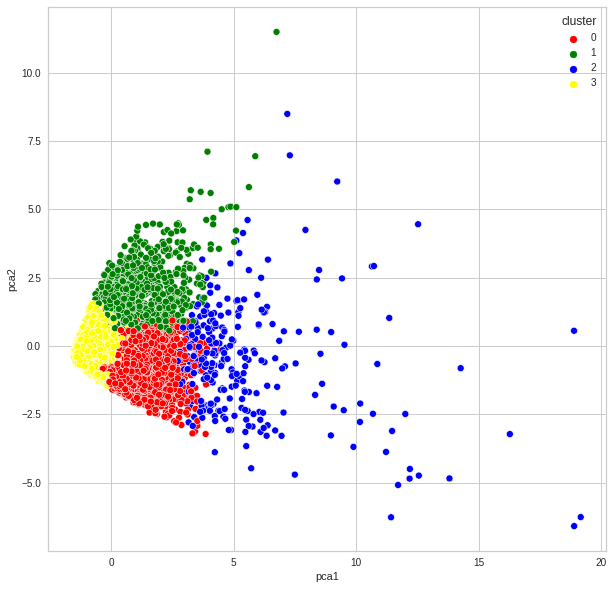

In [ ]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'yellow'])

### 8. Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

def cluster_Hierarchical(df):
    cluster_Hierarchical = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
    cluster_Hierarchical.fit_predict(df)     
    labels_cluster_Hierarchical=cluster_Hierarchical.labels_
    return labels_cluster_Hierarchical

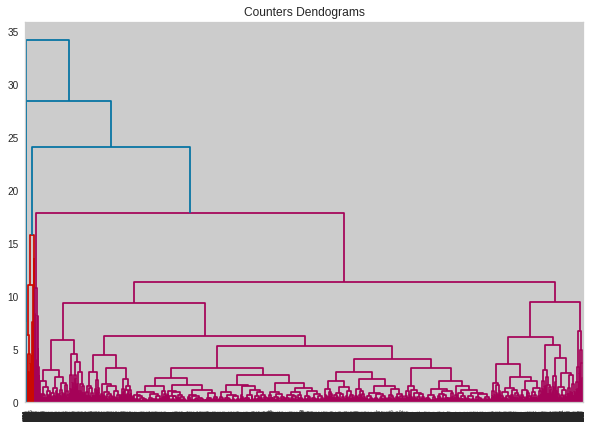

In [107]:
#linkage='complete'
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=pca.fit_transform(df_scaled), method='complete',metric='euclidean')) 
plt.show()

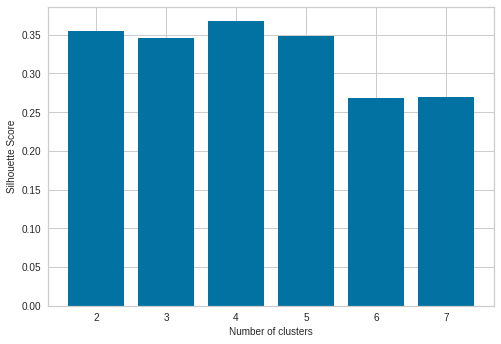

In [108]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(pca.fit_transform(df_scaled), AgglomerativeClustering(n_clusters = n_cluster).fit_predict(pca.fit_transform(df_scaled)))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [109]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(pca.fit_transform(df_scaled))

AgglomerativeClustering(n_clusters=3)

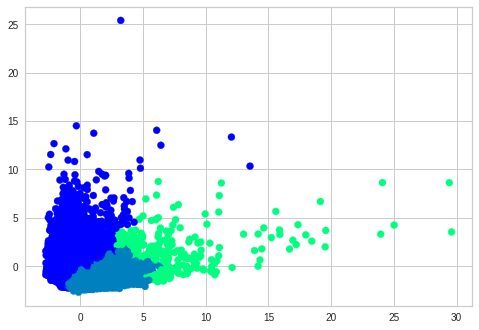

In [115]:
plt.scatter(pca.fit_transform(df_scaled)[:, 0], pca.fit_transform(df_scaled)[:, 1], c = AgglomerativeClustering(n_clusters = 3).fit_predict(pca.fit_transform(df_scaled)), cmap =plt.cm.winter) 
plt.show() 